##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [1]:
# The following packages that were used are;
# pandas , seaborn, numpy, matplotlib, scikit-learn

#%pip install pandas 
#%pip install seaborn
#%pip install numpy
#%pip install matplotlib
#%pip install scikit-learn

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .parquet file inside that. A relative path *must* be used when loading data into pandas

In [2]:
# Import Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Importing of data
filepath = "./data/catB_train.parquet" 
data = pd.read_parquet(filepath, engine = "pyarrow")
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

# Exploratory Data Analysis

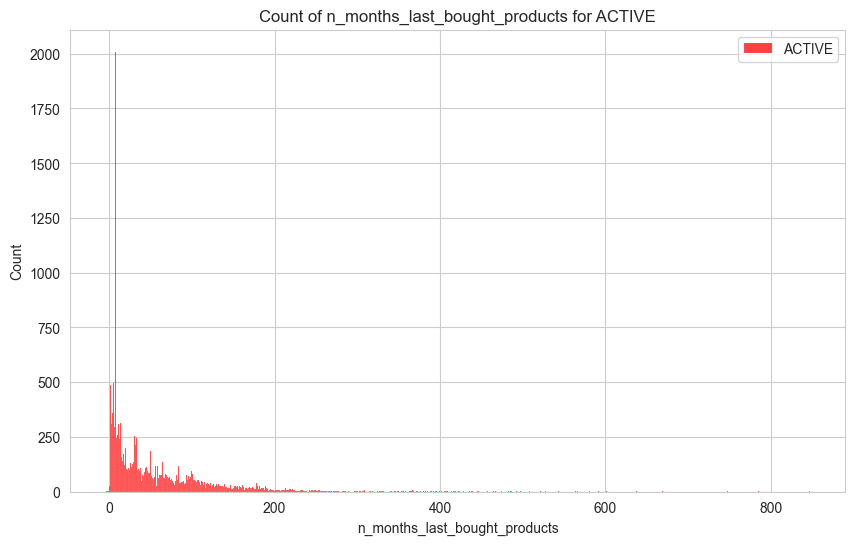

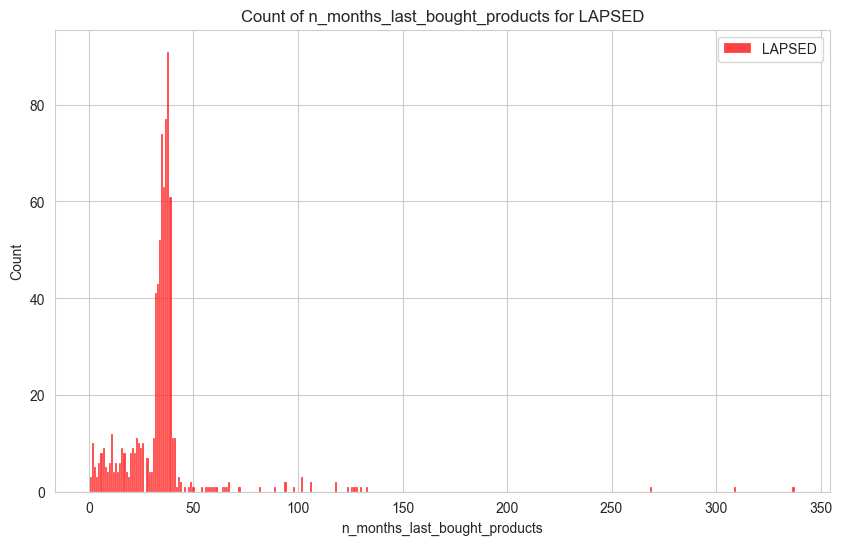

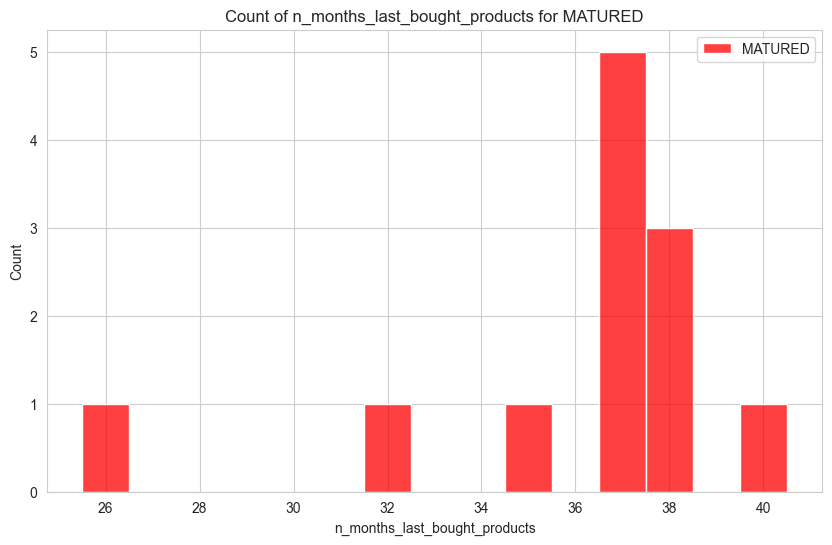

In [5]:
# Get unique values in the stat_flag column
unique_stat_flags = data['stat_flag'].unique()

# Set the style of seaborn
sns.set_style("whitegrid")

def check_stat_flag(df):
# Iterate over each unique value in stat_flag
    for stat_flag_category in unique_stat_flags:
        # Filter the data for the current stat_flag category
        data = df[df['stat_flag'] == stat_flag_category]
        
        # Sort the data by the column of interest
        data_sorted = data.sort_values(by='n_months_last_bought_products')
        
        # Create a new figure for each unique stat_flag
        plt.figure(figsize=(10, 6))
        
        # Plot the line graph for the current stat_flag category
        sns.histplot(data=data_sorted, x='n_months_last_bought_products', kde=False, label=stat_flag_category, stat='count', color='blue' if stat_flag_category == 'Active' else 'red', bins=10, discrete=True)
        
        # Set the title and labels
        plt.title(f'Count of n_months_last_bought_products for {stat_flag_category}')
        plt.xlabel('n_months_last_bought_products')
        plt.ylabel('Count')
        
        # Show legend
        plt.legend()
        
        # Show the plot
        plt.show()

check_stat_flag(data)

In [6]:
def tidy(df):
    # Define columns to be removed in pairs of (start, end) where columns in this range will be removed
    toRemove = [
        # Pairs of column names indicating ranges to remove
        ("ape_gi_42e115", "prempaid_32c74c"),
        ("f_hold_839f8a", "f_hold_gi"),
        ("f_ever_bought_839f8a", "f_ever_bought_gi"),
        ("f_ever_bought_ltc_1280bf", "f_ever_bought_32c74c"),
        ("recency_hlthclaim", "recency_hlthclaim"),
        ("recency_hlthclaim_success", "recency_hlthclaim_success"),
        ("recency_hlthclaim_unsuccess","recency_hlthclaim_unsuccess"),
        ("recency_giclaim","recency_giclaim"),
        ("recency_giclaim_success","recency_giclaim_success"),
        ("recency_giclaim_unsuccess","recency_giclaim_unsuccess")
    ]

    # List to store indices of columns to be removed
    toRemove_index = []
    
    # Loop through each pair and calculate their indices in the dataframe
    for start, end in toRemove:
        startIndex = df.columns.get_loc(start)
        endIndex = df.columns.get_loc(end)
        # Extend the removal list with the range of indices
        toRemove_index.extend(range(startIndex, endIndex + 1))

    # Drop the columns from the dataframe
    df = df.drop(columns=df.columns[toRemove_index])

    # Define columns to be edited where NaN values will be replaced with 0.0
    toEdit_zerosfloat = [
        ("lapse_ape_ltc_1280bf", "lapse_ape_32c74c"),
        ("hlthclaim_amt", "hlthclaim_amt"),
        ("giclaim_amt", "giclaim_amt")
    ]

    toEdit1 = []

    # Calculate the indices for columns to edit with 0.0 for NaN
    for start, end in toEdit_zerosfloat:
        startIndex = df.columns.get_loc(start)
        endIndex = df.columns.get_loc(end)
        toEdit1.extend(range(startIndex, endIndex + 1))

    # Replace NaN values with 0.0 for the specified columns
    temp1 = df.iloc[:, toEdit1]
    temp1 = temp1.fillna(0.0)
    df.iloc[:, toEdit1] = temp1

    # Define columns to be edited where NaN values will be replaced with 9999
    toEdit_9999 = [
        ("n_months_since_lapse_ltc_1280bf", "n_months_since_lapse_32c74c"),
        ("recency_hlthclaim_839f8a", "recency_hlthclaim_839f8a"),
        ("recency_hlthclaim_14cb37", "recency_hlthclaim_14cb37"),
        ("n_months_since_visit_affcon", "n_months_since_visit_affcon"),
        ("recency_clmcon", "recency_clmcon_regis")
    ]

    toEdit2 = []
    
    # Calculate the indices for columns to edit with 9999 for NaN
    for start, end in toEdit_9999:
        startIndex = df.columns.get_loc(start)
        endIndex = df.columns.get_loc(end)
        toEdit2.extend(range(startIndex, endIndex + 1))

    # Replace NaN values with 9999 for the specified columns
    temp2 = df.iloc[:, toEdit2]
    temp2 = temp2.fillna(9999)
    df.iloc[:, toEdit2] = temp2

    # Define columns to be edited where NaN values will be replaced with 0
    toEdit_zeros = [
        ("flg_affconnect_show_interest_ever", "affcon_visit_days"),
        ("clmcon_visit_days", "clmcon_visit_days"),
        ("hlthclaim_cnt_success", "hlthclaim_cnt_success"),
        ("hlthclaim_cnt_unsuccess", "hlthclaim_cnt_unsuccess"),
        ("flg_hlthclaim_839f8a_ever", "flg_hlthclaim_839f8a_ever"),
        ("flg_hlthclaim_14cb37_ever", "flg_hlthclaim_14cb37_ever"),
        ("giclaim_cnt_success", "giclaim_cnt_success"),
        ("giclaim_cnt_unsuccess", "giclaim_cnt_unsuccess"),
        ("flg_gi_claim_29d435_ever", "flg_gi_claim_856320_ever")
    ]

    toEdit3 = []

    # Calculate the indices for columns to edit with 0 for NaN
    for start, end in toEdit_zeros:
        startIndex = df.columns.get_loc(start)
        endIndex = df.columns.get_loc(end)
        toEdit3.extend(range(startIndex, endIndex + 1))

    # Replace NaN values with 0 for the specified columns
    temp3 = df.iloc[:, toEdit3]
    temp3 = temp3.fillna(0)
    df.iloc[:, toEdit3] = temp3

    return df

# Clean data
df = tidy(data)


C:\Users\isaac\AppData\Local\Temp\ipykernel_22120\63906608.py:96: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, toEdit3] = temp3


## Decision Tree Model

In [15]:
# Reset index and drop unnecessary columns
tree_df = df.reset_index()
tree_df = tree_df.drop(["index", "clntnum"], axis=1)
tree_df = tree_df.convert_dtypes()

# Replace 'None' values with NaN
tree_df.replace('None', np.nan, inplace=True)

# Convert specified string columns to Int64
categorical_columns = tree_df.select_dtypes(['string']).columns
n_month_cols = list(filter(lambda x: "n_months_last_bought" in x, categorical_columns))
n_month_cols.extend(["hh_20", "pop_20"])
tree_df[n_month_cols] = tree_df[n_month_cols].apply(lambda x: x.astype('Int64'))

# Convert Dates to datetime objects
tree_df["min_occ_date"] = pd.to_datetime(tree_df["min_occ_date"])
tree_df["cltdob_fix"] = pd.to_datetime(tree_df["cltdob_fix"])

# Calculate client age and interaction age in days
tree_df["client_age"] = datetime.datetime.now() - tree_df["cltdob_fix"]
tree_df["client_age"] = tree_df["client_age"].apply(lambda x: x.days)
tree_df["interaction_age"] = datetime.datetime.now() - tree_df["min_occ_date"]
tree_df["interaction_age"] = tree_df["interaction_age"].apply(lambda x: x.days)

# Drop original date columns
tree_df = tree_df.drop(["min_occ_date", "cltdob_fix"], axis=1)

# Encode categorical columns using Label Encoding
categorical_columns = tree_df.select_dtypes(['string']).columns
cat_col_encoders = {}

for c in categorical_columns:
    # Fill NaN values with "NaN" and apply Label Encoding
    tree_df[c] = tree_df[c].fillna("NaN")
    le_c = LabelEncoder()
    le_c.fit(tree_df[c])
    tree_df[c] = le_c.transform(tree_df[c])
    cat_col_encoders[c] = le_c

# Fill NaN values in a specific column with a predefined value
tree_df["f_ever_declined_la"] = tree_df["f_ever_declined_la"].fillna(-1)

# Convert Object columns to int64
object_columns = tree_df.select_dtypes(['object']).columns
tree_df[object_columns] = tree_df[object_columns].astype(np.int64)

# Fill NaN values in a specific column with a predefined value
tree_df["f_purchase_lh"] = tree_df["f_purchase_lh"].fillna(0)

# Display the DataFrame with all columns
with pd.option_context('display.max_columns', None):
    display(tree_df)

# Display unique values in a specific column
tree_df["f_purchase_lh"].unique()


,race_desc,ctrycode_desc,clttype,stat_flag,cltsex_fix,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,flg_has_life_claim,flg_gi_claim,flg_is_proposal,flg_with_preauthorisation,flg_is_returned_mail,is_consent_to_mail,is_consent_to_email,is_consent_to_call,is_consent_to_sms,is_valid_dm,is_valid_email,is_housewife_retiree,is_sg_pr,is_class_1_2,is_dependent_in_at_least_1_policy,f_ever_declined_la,hh_20,pop_20,hh_size,hh_size_est,annual_income_est,n_months_last_bought_products,flg_latest_being_lapse,flg_latest_being_cancel,recency_lapse,recency_cancel,tot_inforce_pols,tot_cancel_pols,ape_839f8a,ape_e22a6a,ape_d0adeb,ape_c4bda5,ape_ltc,ape_507c37,ape_gi,sumins_839f8a,sumins_e22a6a,sumins_d0adeb,sumins_c4bda5,sumins_ltc,sumins_507c37,sumins_gi,prempaid_839f8a,prempaid_e22a6a,prempaid_d0adeb,prempaid_c4bda5,prempaid_ltc,prempaid_507c37,prempaid_gi,lapse_ape_ltc_1280bf,lapse_ape_grp_6fc3e6,lapse_ape_grp_de05ae,lapse_ape_inv_dcd836,lapse_ape_grp_945b5a,lapse_ape_grp_6a5788,lapse_ape_ltc_43b9d5,lapse_ape_grp_9cdedf,lapse_ape_lh_d0adeb,lapse_ape_grp_1581d7,lapse_ape_grp_22decf,lapse_ape_lh_507c37,lapse_ape_lh_839f8a,lapse_ape_inv_e9f316,lapse_ape_grp_caa6ff,lapse_ape_grp_fd3bfb,lapse_ape_lh_e22a6a,lapse_ape_grp_70e1dd,lapse_ape_grp_e04c3a,lapse_ape_grp_fe5fb8,lapse_ape_grp_94baec,lapse_ape_grp_e91421,lapse_ape_lh_f852af,lapse_ape_lh_947b15,lapse_ape_32c74c,n_months_since_lapse_ltc_1280bf,n_months_since_lapse_grp_6fc3e6,n_months_since_lapse_grp_de05ae,n_months_since_lapse_inv_dcd836,n_months_since_lapse_grp_945b5a,n_months_since_lapse_grp_6a5788,n_months_since_lapse_ltc_43b9d5,n_months_since_lapse_grp_9cdedf,n_months_since_lapse_lh_d0adeb,n_months_since_lapse_grp_1581d7,n_months_since_lapse_grp_22decf,n_months_since_lapse_lh_507c37,n_months_since_lapse_lh_839f8a,n_months_since_lapse_inv_e9f316,n_months_since_lapse_grp_caa6ff,n_months_since_lapse_grp_fd3bfb,n_months_since_lapse_lh_e22a6a,n_months_since_lapse_grp_70e1dd,n_months_since_lapse_grp_e04c3a,n_months_since_lapse_grp_fe5fb8,n_months_since_lapse_grp_94baec,n_months_since_lapse_grp_e91421,n_months_since_lapse_lh_f852af,n_months_since_lapse_lh_947b15,n_months_since_lapse_32c74c,n_months_last_bought_839f8a,n_months_last_bought_e22a6a,n_months_last_bought_d0adeb,n_months_last_bought_c4bda5,n_months_last_bought_ltc,n_months_last_bought_507c37,n_months_last_bought_gi,n_months_last_bought_ltc_1280bf,n_months_last_bought_grp_6fc3e6,n_months_last_bought_grp_de05ae,n_months_last_bought_inv_dcd836,n_months_last_bought_grp_945b5a,n_months_last_bought_grp_6a5788,n_months_last_bought_ltc_43b9d5,n_months_last_bought_grp_9cdedf,n_months_last_bought_lh_d0adeb,n_months_last_bought_grp_1581d7,n_months_last_bought_grp_22decf,n_months_last_bought_lh_507c37,n_months_last_bought_lh_839f8a,n_months_last_bought_inv_e9f316,n_months_last_bought_grp_caa6ff,n_months_last_bought_grp_fd3bfb,n_months_last_bought_lh_e22a6a,n_months_last_bought_grp_70e1dd,n_months_last_bought_grp_e04c3a,n_months_last_bought_grp_fe5fb8,n_months_last_bought_grp_94baec,n_months_last_bought_grp_e91421,n_months_last_bought_lh_f852af,n_months_last_bought_lh_947b15,n_months_last_bought_32c74c,f_elx,f_mindef_mha,f_retail,flg_affconnect_show_interest_ever,flg_affconnect_ready_to_buy_ever,flg_affconnect_lapse_ever,affcon_visit_days,n_months_since_visit_affcon,clmcon_visit_days,recency_clmcon,recency_clmcon_regis,hlthclaim_amt,hlthclaim_cnt_success,hlthclaim_cnt_unsuccess,flg_hlthclaim_839f8a_ever,recency_hlthclaim_839f8a,flg_hlthclaim_14cb37_ever,recency_hlthclaim_14cb37,giclaim_amt,giclaim_cnt_success,giclaim_cnt_unsuccess,flg_gi_claim_29d435_ever,flg_gi_claim_058815_ever,flg_gi_claim_42e115_ever,flg_gi_claim_856320_ever,f_purchase_lh,client_age,interaction_age
0,0,17,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,-1,144,202,1.402778,1,2,1,0,0,29,<NA>,3,<NA>,0,318,0,0,551,0,0,0,0,0,0,700,0,0,0,16854,0,0,29203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9999,9999,9999,9999,9999,99

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [9]:
# filter for columns with flags

tree_df2 = tree_df.loc[:,"race_desc":"n_months_last_bought_products"]
tree_df3 = tree_df.loc[:,"f_purchase_lh":"interaction_age"]

tree_df4 = pd.concat([tree_df2, tree_df3], axis = 1)

tree_df4 = tree_df4.dropna()

with pd.option_context('display.max_columns', None):
    display(tree_df4)

,race_desc,ctrycode_desc,clttype,stat_flag,cltsex_fix,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,flg_has_life_claim,flg_gi_claim,flg_is_proposal,flg_with_preauthorisation,flg_is_returned_mail,is_consent_to_mail,is_consent_to_email,is_consent_to_call,is_consent_to_sms,is_valid_dm,is_valid_email,is_housewife_retiree,is_sg_pr,is_class_1_2,is_dependent_in_at_least_1_policy,f_ever_declined_la,hh_20,pop_20,hh_size,hh_size_est,annual_income_est,n_months_last_bought_products,f_purchase_lh,client_age,interaction_age
0,0,17,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,-1,144,202,1.402778,1,2,1,0,18162.0,2281.0
1,0,17,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,-1,153,480,3.137255,3,3,45,0,16150.0,6095.0
2,4,17,2,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,-1,62,179,2.887097,3,0,47,0,17533.0,1612.0
3,0,17,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,-1,1,4,4.0,4,1,22,0,17482.0,833.0
4,0,17,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1,0,-1,114,478,4.192982,5,4,62,0,10409.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17986,0,17,2,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,1,0,1,0,0,-1,109,328,3.009174,3,3,45,0,17202.0,3468.0
17987,3,17,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,-1,85,273,3.211765,3,4,36,0,10842.0,2737.0
17988,0,17,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,-1,0,0,0.0,0,1,407,0,27437.0,12368.0
17989,0,17,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,-1,43,145,3.372093,3,3,101,0,20508.0,5873.0


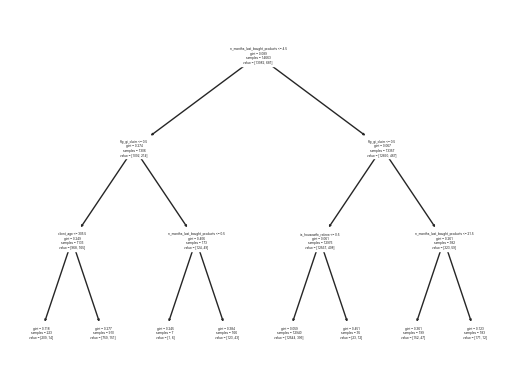

In [10]:
# create decision tree model

X = tree_df4.loc[:, tree_df4.columns != "f_purchase_lh"]
y = tree_df4["f_purchase_lh"]

dtree = DecisionTreeClassifier(max_depth = 3)
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names = tree_df4.columns)
plt.savefig('out.pdf')

In [12]:
# Check Accuracy

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Making predictions on the test set
y_pred = dtree.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(list(y_test), list(y_pred))
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.95


## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [13]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''
    result = [] 
    return result

##### Cell to check testing_hidden_data function

In [14]:
# This cell should output a list of predictions.
test_df = pd.read_parquet(filepath)
test_df = test_df.drop(columns=["f_purchase_lh"])
print(testing_hidden_data(test_df))

[]


### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!